In [1]:
### Imports ###
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
### Get nltk package if needed ###
# import nltk
# nltk.download()

In [3]:
### Get test data (filename, content) ###
import glob, os

# Testing path
inputPath = '/home/radlab/dev/bdec/test_data/inputs/cluster-sample'

data = []

# Loop through each filename ending with .txt in inputPath and open each one
for filename in glob.glob(os.path.join(inputPath, '*.txt')):
    
    # Open the document
    with open(filename, 'r') as f:
        sample = f.read()
        data.append((filename, sample))

In [4]:
### Convert data to tagged format ###
tagged_data = []

for item in data:
    tagged_data.append(TaggedDocument(words=word_tokenize(item[1].lower()), tags=[item[0]]))               
# print(tagged_data)

In [5]:
### Build Model ###
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.025,
                min_count=1,
                dm=1)
  
model.build_vocab(tagged_data)

print('Running...')

for epoch in range(max_epochs):
#     print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Doc2Vec Model Saved")
model.save_word2vec_format('w2v.model')
print("Word2Vec Model Saved")

Running...
Doc2Vec Model Saved
Word2Vec Model Saved


In [6]:
### Check Model Vectors ###
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("Human Immunodeficiency Virus 1 uses for entry into host cells a receptor and one of two co-receptors.".lower())
v1 = model.infer_vector(test_data)
print("V1_infer:", v1)

# to find most similar doc using tags
similar_doc = model.docvecs.most_similar([v1])
print("Similar:", similar_doc)

# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print("Doc 1 vec:", model.docvecs[0])

V1_infer: [ 0.32929614  0.2662897  -0.94182754  0.6694483   0.21147376 -0.45749626
  0.21836594  0.44582453 -0.25948632 -0.93766195 -0.68508315  0.16138382
 -0.84500605  0.5352728  -0.88616997 -0.0892091   0.3258434   0.40343243
 -0.03136711  0.27332383]
Similar: [('/home/radlab/dev/bdec/test_data/inputs/cluster-sample/arxiv_annotate1_13_1.txt', 0.7439923286437988), ('/home/radlab/dev/bdec/test_data/inputs/cluster-sample/arxiv_annotate1_13_2.txt', 0.7381069660186768), ('/home/radlab/dev/bdec/test_data/inputs/cluster-sample/jdm_annotate4_220_2.txt', 0.7305269241333008), ('/home/radlab/dev/bdec/test_data/inputs/cluster-sample/jdm_annotate4_220_3.txt', 0.7304108738899231), ('/home/radlab/dev/bdec/test_data/inputs/cluster-sample/arxiv_annotate1_13_3.txt', 0.7302678227424622), ('/home/radlab/dev/bdec/test_data/inputs/cluster-sample/jdm_annotate4_220_1.txt', 0.7283835411071777), ('/home/radlab/dev/bdec/test_data/inputs/cluster-sample/arxiv_annotate8_81_1.txt', 0.7204194068908691), ('/home/ra

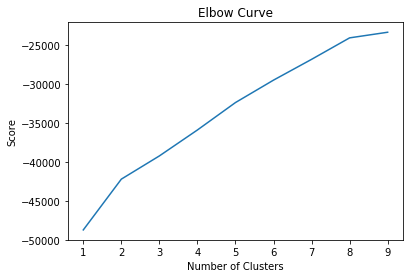

In [7]:
### Identify no. of clusters using elbow curve ###
import pylab as pl

# Load doc2vec model if not already loaded
d2v_model= Doc2Vec.load("d2v.model")

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i, init='k-means++', max_iter=100) for i in Nc]
# kmeans
Y = d2v_model.docvecs.doctag_syn0
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
# score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

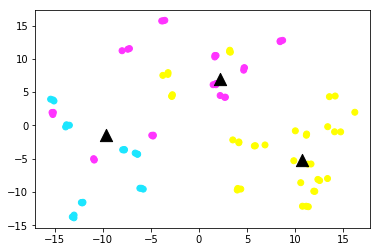

In [8]:
### Use K-Means to cluster data ###

# Load doc2vec model
d2v_model= Doc2Vec.load("d2v.model")

kmeans_model = KMeans(n_clusters=3, init='k-means++', max_iter=100)  

# Cluster points
X = kmeans_model.fit(d2v_model.docvecs.doctag_syn0)
labels=kmeans_model.labels_.tolist()    

# Create cluster centres
l = kmeans_model.fit_predict(d2v_model.docvecs.doctag_syn0)

pca = PCA(n_components=2).fit(d2v_model.docvecs.doctag_syn0)
datapoint = pca.transform(d2v_model.docvecs.doctag_syn0)

plt.figure
c_map = ["#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
        "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
        "#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
        "#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
        "#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
        "#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
        
        "#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
        "#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
        "#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
        "#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
        "#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C",
        "#83AB58", "#001C1E", "#D1F7CE", "#004B28", "#C8D0F6", "#A3A489", "#806C66", "#222800",
        "#BF5650", "#E83000", "#66796D", "#DA007C", "#FF1A59", "#8ADBB4", "#1E0200", "#5B4E51",
        "#C895C5", "#320033", "#FF6832", "#66E1D3", "#CFCDAC", "#D0AC94", "#7ED379", "#012C58",
        
        "#7A7BFF", "#D68E01", "#353339", "#78AFA1", "#FEB2C6", "#75797C", "#837393", "#943A4D",
        "#B5F4FF", "#D2DCD5", "#9556BD", "#6A714A", "#001325", "#02525F", "#0AA3F7", "#E98176",
        "#DBD5DD", "#5EBCD1", "#3D4F44", "#7E6405", "#02684E", "#962B75", "#8D8546", "#9695C5",
        "#E773CE", "#D86A78", "#3E89BE", "#CA834E", "#518A87", "#5B113C", "#55813B", "#E704C4",
        "#00005F", "#A97399", "#4B8160", "#59738A", "#FF5DA7", "#F7C9BF", "#643127", "#513A01",
        "#6B94AA", "#51A058", "#A45B02", "#1D1702", "#E20027", "#E7AB63", "#4C6001", "#9C6966",
        "#64547B", "#97979E", "#006A66", "#391406", "#F4D749", "#0045D2", "#006C31", "#DDB6D0",
        "#7C6571", "#9FB2A4", "#00D891", "#15A08A", "#BC65E9", "#FFFFFE", "#C6DC99", "#203B3C",

        "#671190", "#6B3A64", "#F5E1FF", "#FFA0F2", "#CCAA35", "#374527", "#8BB400", "#797868",
        "#C6005A", "#3B000A", "#C86240", "#29607C", "#402334", "#7D5A44", "#CCB87C", "#B88183",
        "#AA5199", "#B5D6C3", "#A38469", "#9F94F0", "#A74571", "#B894A6", "#71BB8C", "#00B433",
        "#789EC9", "#6D80BA", "#953F00", "#5EFF03", "#E4FFFC", "#1BE177", "#BCB1E5", "#76912F",
        "#003109", "#0060CD", "#D20096", "#895563", "#29201D", "#5B3213", "#A76F42", "#89412E",
        "#1A3A2A", "#494B5A", "#A88C85", "#F4ABAA", "#A3F3AB", "#00C6C8", "#EA8B66", "#958A9F",
        "#BDC9D2", "#9FA064", "#BE4700", "#658188", "#83A485", "#453C23", "#47675D", "#3A3F00",
        "#061203", "#DFFB71", "#868E7E", "#98D058", "#6C8F7D", "#D7BFC2", "#3C3E6E", "#D83D66",
        
        "#2F5D9B", "#6C5E46", "#D25B88", "#5B656C", "#00B57F", "#545C46", "#866097", "#365D25",
        "#252F99", "#00CCFF", "#674E60", "#FC009C", "#92896B"]

colour = [c_map[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=colour)

centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [9]:
### Save model ###
from sklearn.externals import joblib

# Check cluster centres
print(kmeans_model.cluster_centers_)

# save the model to disk
filename = 'kmeans_model.sav'
joblib.dump(kmeans_model, filename)
print('Model saved...')

[[  6.5100317    6.111223    -6.3270025    4.2935605   -3.2323375
   -3.437998     0.89826334   1.0986936   -2.5293078  -11.41803
   -4.085848     3.5768485   -3.6848352    4.2909474   -6.982294
   -6.493556     1.4931028    1.2283899   -2.2457464    4.7232485 ]
 [ -0.2942567    7.195917    -8.414189    13.004486     0.34331322
   -4.921007    -1.171951     0.97619176  -0.86961985  -7.1336827
   -4.6585307   -1.731988    -1.2298962    9.861271    -4.780327
   -2.7641127    5.4564953    3.263812    -1.0055612    0.38364816]
 [  5.47579      0.9812627   -5.0507565    3.938404     5.4552646
   -3.2893639   -3.9340372    8.056549    -9.956859    -9.350906
   -7.3116837    2.2825718   -2.474646     4.853317    -4.9350924
    0.48330355   0.9315946    1.5693605   -2.8316126    4.9016275 ]]
Model saved...


In [10]:
### Load model ###
kmeans_model = joblib.load(filename)
print('Model loaded...')
print(kmeans_model.cluster_centers_)

Model loaded...
[[  6.5100317    6.111223    -6.3270025    4.2935605   -3.2323375
   -3.437998     0.89826334   1.0986936   -2.5293078  -11.41803
   -4.085848     3.5768485   -3.6848352    4.2909474   -6.982294
   -6.493556     1.4931028    1.2283899   -2.2457464    4.7232485 ]
 [ -0.2942567    7.195917    -8.414189    13.004486     0.34331322
   -4.921007    -1.171951     0.97619176  -0.86961985  -7.1336827
   -4.6585307   -1.731988    -1.2298962    9.861271    -4.780327
   -2.7641127    5.4564953    3.263812    -1.0055612    0.38364816]
 [  5.47579      0.9812627   -5.0507565    3.938404     5.4552646
   -3.2893639   -3.9340372    8.056549    -9.956859    -9.350906
   -7.3116837    2.2825718   -2.474646     4.853317    -4.9350924
    0.48330355   0.9315946    1.5693605   -2.8316126    4.9016275 ]]


In [11]:
d2v_model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data1 = word_tokenize("Human Immunodeficiency Virus 1 uses for entry into host cells a receptor and one of two co-receptors.".lower())
v1 = d2v_model.infer_vector(test_data1)

test_data2 = word_tokenize("AIMX	In this paper, we approach the problem in its most general form by algebraic methods and give a complete algebraic characterization of tractable constraint languages".lower())
v2 = d2v_model.infer_vector(test_data2)

test_data3 = word_tokenize("OWNX On the other hand, if one were to look for mechanically strong proteins then the architectures and folds identified by us should provide a good starting point.".lower())
v3 = d2v_model.infer_vector(test_data3)

kmeans_model = joblib.load(filename)
pre1 = kmeans_model.predict([v1])
print(pre1)

pre2 = kmeans_model.predict([v2])
print(pre2)

pre3 = kmeans_model.predict([v3])
print(pre3)

[0]
[0]
[0]
